# Preprocessing the data

In [27]:
# Readthe csv data and crate the dataframe
from pathlib import Path
import pandas as pd
import seaborn as sns
path = Path("Resources/combined_data.csv")
df = pd.read_csv(path)
df.dropna(inplace=True)
df.head()

,Year,Quarter,Fraud Reporting Count,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
1,2014,2,95516,39.8,82364.0,36.8
2,2014,3,94084,38.1,95516.0,39.8
3,2014,4,90868,36.0,94084.0,38.1
4,2015,1,90566,39.0,90868.0,36.0
5,2015,2,96365,42.6,90566.0,39.0


In [28]:
# slice features and target
x = df.drop(columns=['Fraud Reporting Count', 'Quarter'])
y = df["Fraud Reporting Count"].values.reshape(-1, 1)
display(x.head())
display(y[:5])

,Year,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
1,2014,39.8,82364.0,36.8
2,2014,38.1,95516.0,39.8
3,2014,36.0,94084.0,38.1
4,2015,39.0,90868.0,36.0
5,2015,42.6,90566.0,39.0


array([[95516],
       [94084],
       [90868],
       [90566],
       [96365]])

In [29]:
#Slicing data into train and test subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=False, random_state=1)

In [30]:
from sklearn.preprocessing  import StandardScaler

#Scaling x data
x_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

#Scaling y data
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Decision Tree Model

#### Training

In [31]:
#Train the decisin tree model
from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=1)
model = model.fit(x_train_scaled, y_train_scaled)

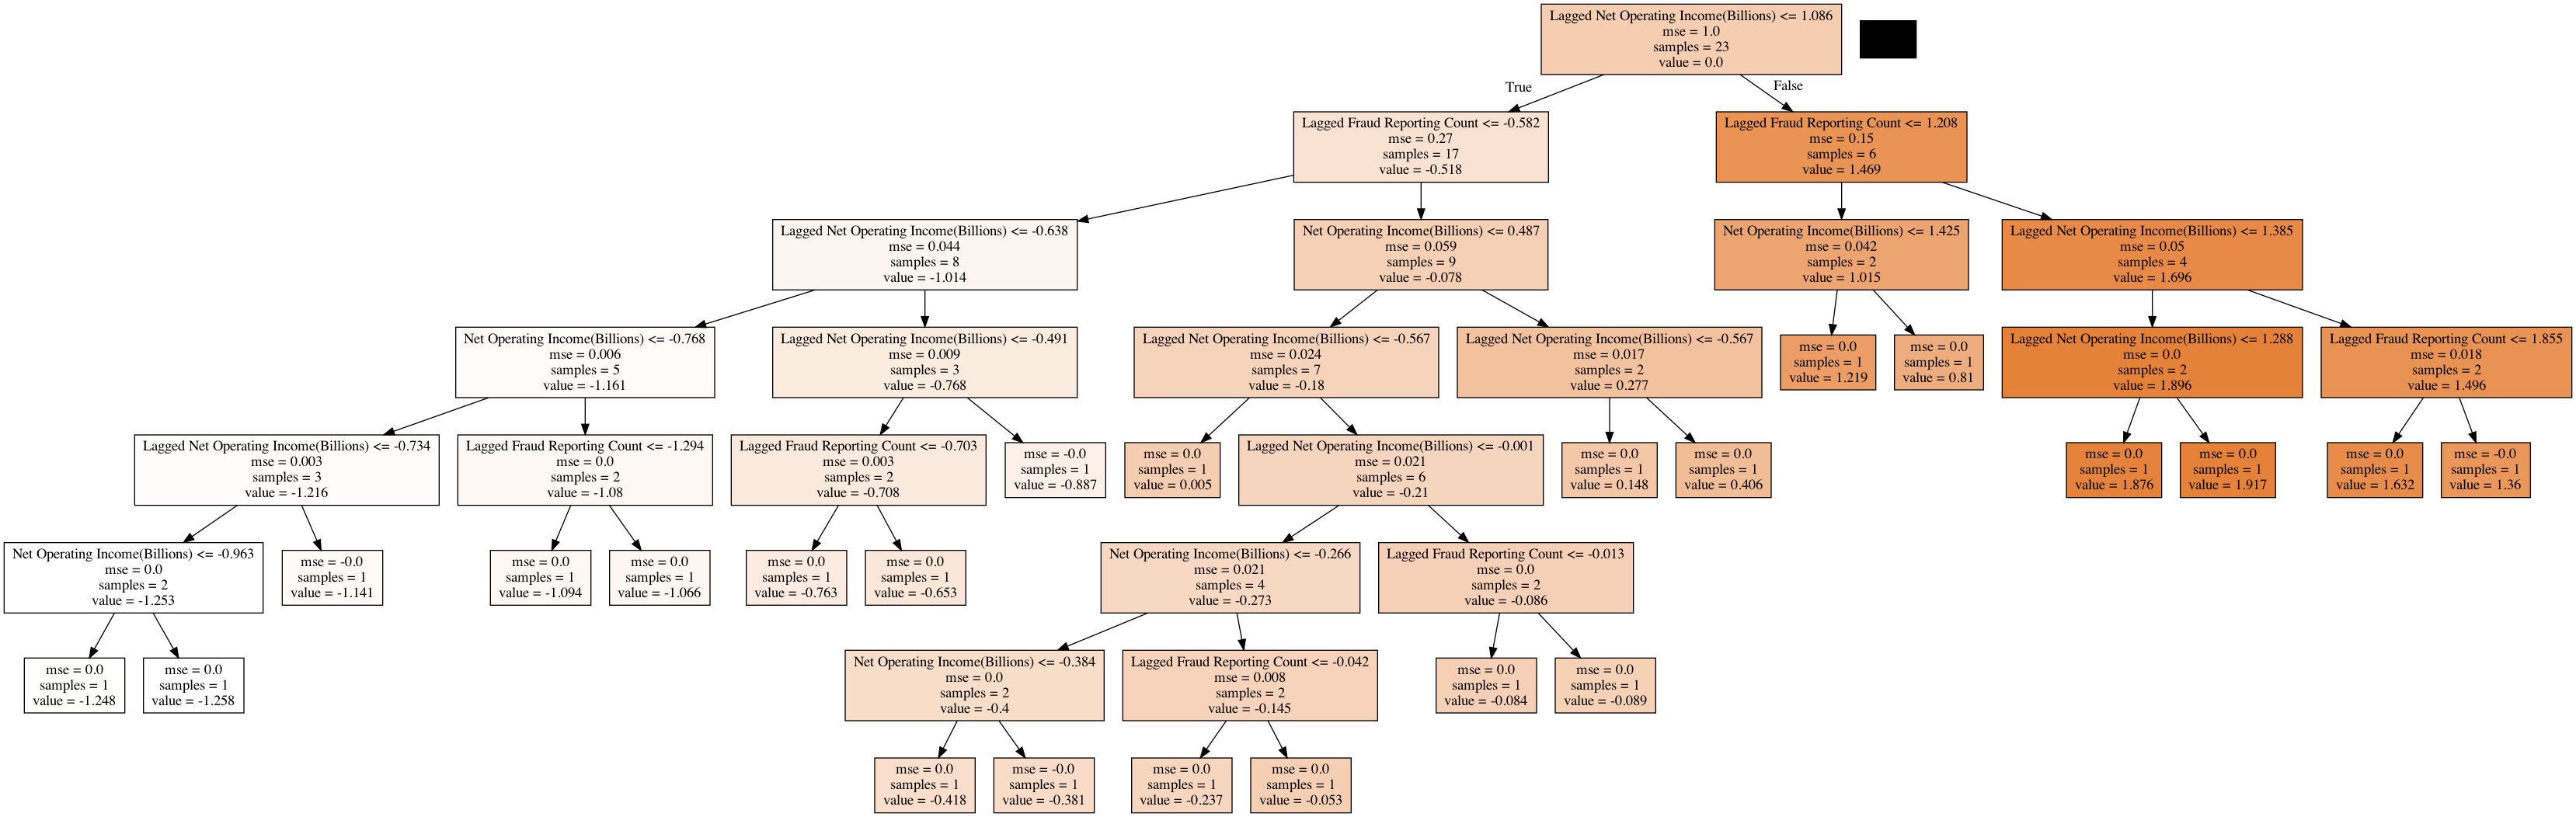

In [32]:
#Visualizing the Decision Tree Model
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None, feature_names=x.columns, class_names=["0", "1"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

#### Predicitons

In [33]:
from sklearn.metrics import mean_squared_error, mean_squared_error, explained_variance_score, r2_score, mean_absolute_error

#Perform the prediciton
y_pred = model.predict(x_test_scaled)

#Displaying Metrics
print(f'The Mean Squared Error is: {mean_squared_error(y_test_scaled, y_pred)}')
print(f'The Explained Variance Score is: {explained_variance_score(y_test_scaled, y_pred)}')
print(f'The R squared is: {r2_score(y_test_scaled, y_pred)}')
print(f'The Mean Absolute Error is: {mean_absolute_error(y_test_scaled, y_pred)}')

The Mean Squared Error is: 5.976725264677829
The Explained Variance Score is: 0.2964646067002187
The R squared is: -4.11658500367941
The Mean Absolute Error is: 2.27044483581189


#### Visualizing the model's performance

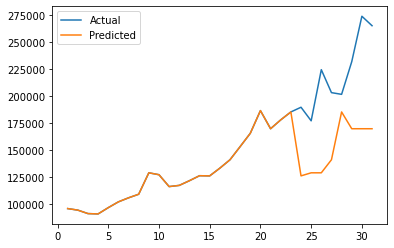

In [34]:
import numpy as np
y_pred_train = model.predict(x_train_scaled)
concatenated = np.concatenate((y_pred_train, y_pred))
y_predicted = y_scaler.inverse_transform(concatenated)

results = pd.DataFrame({
    "Actual":df["Fraud Reporting Count"],
    "Predicted":y_predicted
}).plot()

